In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# List of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots']
categories = ['Fruit', 'Vegetables', 'Dairy', 'Meat', 'Bakery']

# Function to generate random data
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        category = random.choice(categories)
        price = round(random.uniform(0.5, 20), 2)
        weight = random.choice([100, 250, 500, 1000])  # in grams
        available = random.randint(1, 200)
        expiresAt = datetime.now() + timedelta(days=random.randint(1, 365))
        data.append([product, category, price, f"{weight}g", available, expiresAt])
    return pd.DataFrame(data, columns=['Product', 'Category', 'Price', 'Weight', 'Available', 'ExpiresAt'])

# Generate 1000 rows of fake data
fake_data = generate_fake_data(1000)
print(fake_data.head())
# Save the fake data as a CSV file
fake_data.to_csv('fake_data.csv', index=False)

   Product    Category  Price Weight  Available                  ExpiresAt
0   Lemons       Dairy  10.57  1000g        198 2024-11-18 11:57:25.351774
1   Cheese       Fruit   8.59   100g        134 2025-02-24 11:57:25.351774
2   Cheese  Vegetables   3.24   100g        190 2024-12-26 11:57:25.351774
3  Carrots       Dairy  11.40   250g        180 2024-10-23 11:57:25.351774
4    Bread       Dairy   4.90   100g         19 2025-06-04 11:57:25.351774


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
import json

# List of products with pre-defined IDs, names, weights, and packaging units
products = [
    {"id": "8376291", "name": "Organic Cherry Tomatoes", "weight": "250g", "packagingUnit": "punnet"},
    {"id": "5728364", "name": "Sweet Potatoes", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "9126483", "name": "Broccoli Florets", "weight": "400g", "packagingUnit": "bag"},
    {"id": "4537281", "name": "Red Bell Peppers", "weight": "500g", "packagingUnit": "each"},
    {"id": "1928374", "name": "Baby Spinach", "weight": "150g", "packagingUnit": "bag"},
    {"id": "6273849", "name": "White Onions", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "3847295", "name": "Carrots", "weight": "1kg", "packagingUnit": "bag"},
    {"id": "7129384", "name": "Garlic Bulb", "weight": "100g", "packagingUnit": "each"},
    {"id": "2938475", "name": "Green Zucchini", "weight": "500g", "packagingUnit": "each"},
    {"id": "8472931", "name": "Asparagus", "weight": "250g", "packagingUnit": "bunch"},
    # Add more products as needed
]

# Function to generate random data
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        price = round(random.uniform(0.5, 20), 2)
        available = random.randint(1, 200)
        expiresAt = (datetime.now() + timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d')
        
        # Create dictionary for each product in the desired format
        item = {
            "id": product['id'],
            "name": product['name'],
            "expiresAt": expiresAt,
            "price": price,
            "weight": product['weight'],
            "packagingUnit": product['packagingUnit'],
            "available": available
        }
        data.append(item)
    return data

# Generate 100 rows of fake data
fake_data = generate_fake_data(8000)

# Save the data as a JSON file
with open('fake_data.json', 'w') as f:
    json.dump(fake_data, f, indent=4)

print("Data saved to 'fake_data.json'")

Data saved to 'fake_data.json'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
# Load the JSON file into a pandas DataFrame
file_path = 'fake_data.json'  # Adjust the path if needed
fake_data = pd.read_json(file_path)

# View the first few rows of the dataset
fake_data.head()


,id,name,expiresAt,price,weight,packagingUnit,available
0,9126483,Broccoli Florets,2024-10-14,1.51,400g,bag,131
1,8472931,Asparagus,2024-11-16,14.44,250g,bunch,21
2,5728364,Sweet Potatoes,2025-03-13,15.34,1kg,bag,76
3,2938475,Green Zucchini,2024-09-20,19.44,500g,each,29
4,6273849,White Onions,2025-01-12,9.95,1kg,bag,51


In [ ]:
# Convert 'expiresAt' to datetime format
fake_data['expiresAt'] = pd.to_datetime(fake_data['expiresAt'])

# Verify the conversion
print(fake_data.dtypes)

id                        int64
name                     object
expiresAt        datetime64[ns]
price                   float64
weight                   object
packagingUnit            object
available                 int64
dtype: object


In [ ]:
# Calculate 'days_until_expiry'
fake_data['days_until_expiry'] = (fake_data['expiresAt'] - datetime.now()).dt.days

# Check the updated DataFrame
fake_data[['name', 'expiresAt', 'days_until_expiry']].head()

,name,expiresAt,days_until_expiry
0,Broccoli Florets,2024-10-14,36
1,Asparagus,2024-11-16,69
2,Sweet Potatoes,2025-03-13,186
3,Green Zucchini,2024-09-20,12
4,White Onions,2025-01-12,126


In [ ]:
# Check for missing values
print(fake_data.isnull().sum())

id                   0
name                 0
expiresAt            0
price                0
weight               0
packagingUnit        0
available            0
days_until_expiry    0
dtype: int64


In [ ]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Usi

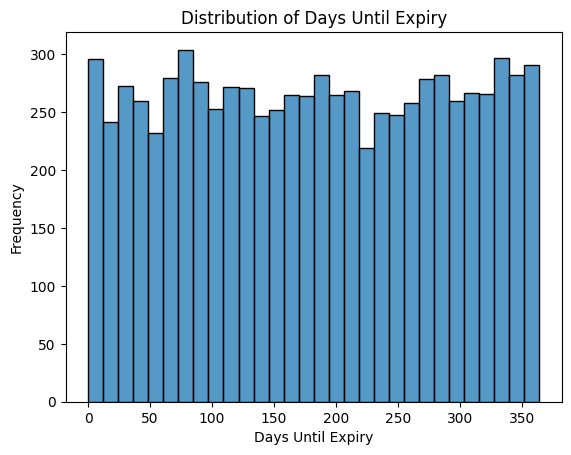

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'days_until_expiry'
sns.histplot(fake_data['days_until_expiry'], bins=30)
plt.title('Distribution of Days Until Expiry')
plt.xlabel('Days Until Expiry')
plt.ylabel('Frequency')
plt.show()

In [ ]:
 #Apply one-hot encoding to 'name' and 'packagingUnit'
fake_data_encoded = pd.get_dummies(fake_data, columns=['name', 'packagingUnit'])

# Drop unnecessary columns ('id' since it doesn't contribute to the prediction)
fake_data_encoded = fake_data_encoded.drop(columns=['id', 'weight', 'expiresAt'])

# Display the first few rows of the encoded data
fake_data_encoded.head()

,price,available,days_until_expiry,name_Asparagus,name_Baby Spinach,name_Broccoli Florets,name_Carrots,name_Garlic Bulb,name_Green Zucchini,name_Organic Cherry Tomatoes,name_Red Bell Peppers,name_Sweet Potatoes,name_White Onions,packagingUnit_bag,packagingUnit_bunch,packagingUnit_each,packagingUnit_punnet
0,1.51,131,36,False,False,True,False,False,False,False,False,False,False,True,False,False,False
1,14.44,21,69,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,15.34,76,186,False,False,False,False,False,False,False,False,True,False,True,False,False,False
3,19.44,29,12,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,9.95,51,126,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
# Define the features (X) and target (y)
X = fake_data_encoded.drop(columns=['days_until_expiry'])
y = fake_data_encoded['days_until_expiry']

In [ ]:
!pip install scikit-learn


  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (6400, 16), Test set shape: (1600, 16)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 12612.321707957128
R² Score: -0.14430067879670316


In [ ]:
import numpy as np
from datetime import timedelta

# Assuming 'stock_date' is not available, we simulate it by generating random stock dates.
# Simulating a 'stock_date' column where products were stocked between 1 and 365 days ago.
fake_data['stock_date'] = fake_data['expiresAt'] - pd.to_timedelta(np.random.randint(1, 365, size=len(fake_data)), unit='D')

# Calculate 'days_in_stock' as the difference between today and the stock_date
fake_data['days_in_stock'] = (datetime.now() - fake_data['stock_date']).dt.days

# View the new feature
fake_data[['stock_date', 'days_in_stock']].head()

,stock_date,days_in_stock
0,2023-12-05,277
1,2024-06-25,74
2,2024-04-10,150
3,2023-09-26,347
4,2024-02-27,193


In [ ]:
print(fake_data.columns)

Index(['id', 'name', 'expiresAt', 'price', 'weight', 'packagingUnit',
       'available', 'days_until_expiry', 'stock_date', 'days_in_stock'],
      dtype='object')


In [ ]:
# Adding priority based on 'days_until_expiry'
conditions = [
    (fake_data['days_until_expiry'] <= 3),
    (fake_data['days_until_expiry'] > 3) & (fake_data['days_until_expiry'] <= 8),
    (fake_data['days_until_expiry'] > 8) & (fake_data['days_until_expiry'] <= 14),
    (fake_data['days_until_expiry'] > 14) & (fake_data['days_until_expiry'] <= 28),
    (fake_data['days_until_expiry'] > 28)
]
priorities = [1, 2, 3, 4, 5]  # Priority levels
fake_data['priority'] = pd.cut(fake_data['days_until_expiry'], bins=[-1, 3, 8, 14, 28, float('inf')], labels=priorities)

# Check the result
print(fake_data[['days_until_expiry', 'priority']].head())


   days_until_expiry priority
0                 36        5
1                 69        5
2                186        5
3                 12        3
4                126        5


In [ ]:
# Adding interaction between price and available
fake_data['price_available_interaction'] = fake_data['price'] * fake_data['available']

# Adding interaction between priority and available stock
fake_data['priority_available_interaction'] = fake_data['priority'].astype(float) * fake_data['available']

# Check the result
print(fake_data[['price_available_interaction', 'priority_available_interaction']].head())


   price_available_interaction  priority_available_interaction
0                       197.81                           655.0
1                       303.24                           105.0
2                      1165.84                           380.0
3                       563.76                            87.0
4                       507.45                           255.0


In [ ]:
# Ensure stock_date is in datetime format
fake_data['stock_date'] = pd.to_datetime(fake_data['stock_date'])

# Add time-based features
fake_data['day_of_week'] = fake_data['stock_date'].dt.dayofweek  # Monday=0, Sunday=6
fake_data['is_weekend'] = fake_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# Season feature (Spring=1, Summer=2, Autumn=3, Winter=4)
def assign_season(month):
    if month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Autumn
    else:
        return 4  # Winter

fake_data['season'] = fake_data['stock_date'].dt.month.apply(assign_season)

# Check the new time-based features
print(fake_data[['day_of_week', 'is_weekend', 'season']].head())


   day_of_week  is_weekend  season
0            1           0       4
1            1           0       2
2            2           0       1
3            1           0       3
4            1           0       4


In [ ]:
# Check the columns after adding new features
print(fake_data.columns)

# Show a preview of the updated dataset
print(fake_data.head())


Index(['id', 'name', 'expiresAt', 'price', 'weight', 'packagingUnit',
       'available', 'days_until_expiry', 'stock_date', 'days_in_stock',
       'priority', 'price_available_interaction',
       'priority_available_interaction', 'day_of_week', 'is_weekend',
       'season'],
      dtype='object')
        id              name  expiresAt  price weight packagingUnit  \
0  9126483  Broccoli Florets 2024-10-14   1.51   400g           bag   
1  8472931         Asparagus 2024-11-16  14.44   250g         bunch   
2  5728364    Sweet Potatoes 2025-03-13  15.34    1kg           bag   
3  2938475    Green Zucchini 2024-09-20  19.44   500g          each   
4  6273849      White Onions 2025-01-12   9.95    1kg           bag   

   available  days_until_expiry stock_date  days_in_stock priority  \
0        131                 36 2023-12-05            277        5   
1         21                 69 2024-06-25             74        5   
2         76                186 2024-04-10            150    

In [ ]:
from sklearn.model_selection import train_test_split

# Define feature columns
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 'price_available_interaction',
                'priority_available_interaction', 'day_of_week', 'is_weekend', 'season']

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 4.5000000000009185e-05
R² Score: 0.9999999959172045


In [ ]:
print(fake_data.head())

        id              name  expiresAt  price weight packagingUnit  \
0  9126483  Broccoli Florets 2024-10-14   1.51   400g           bag   
1  8472931         Asparagus 2024-11-16  14.44   250g         bunch   
2  5728364    Sweet Potatoes 2025-03-13  15.34    1kg           bag   
3  2938475    Green Zucchini 2024-09-20  19.44   500g          each   
4  6273849      White Onions 2025-01-12   9.95    1kg           bag   

   available  days_until_expiry stock_date  days_in_stock priority  \
0        131                 36 2023-12-05            277        5   
1         21                 69 2024-06-25             74        5   
2         76                186 2024-04-10            150        5   
3         29                 12 2023-09-26            347        3   
4         51                126 2024-02-27            193        5   

   price_available_interaction  priority_available_interaction  day_of_week  \
0                       197.81                           655.0           

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# List of products and categories
products = ['Tomatoes', 'Lemons', 'Cucumbers', 'Milk', 'Cheese', 'Chicken', 'Bread', 'Carrots']
categories = ['Fruit', 'Vegetables', 'Dairy', 'Meat', 'Bakery']

# Function to generate random data similar to your original dataset
def generate_fake_data(num_rows):
    data = []
    for _ in range(num_rows):
        product = random.choice(products)
        price = round(random.uniform(0.5, 20), 2)
        available = random.randint(1, 200)
        expiresAt = datetime.now() + timedelta(days=random.randint(1, 365))
        stock_date = datetime.now() - timedelta(days=random.randint(1, 60))  # random stock date
        days_in_stock = (datetime.now() - stock_date).days
        days_until_expiry = (expiresAt - datetime.now()).days
        data.append([product, price, available, expiresAt, stock_date, days_in_stock, days_until_expiry])
    return pd.DataFrame(data, columns=['name', 'price', 'available', 'expiresAt', 'stock_date', 'days_in_stock', 'days_until_expiry'])

# Generate 100 rows of fake data
new_fake_data = generate_fake_data(500)

# Check the new dataset
print(new_fake_data.head())


        name  price  available                  expiresAt  \
0      Bread   1.41        139 2025-04-23 12:36:14.234646   
1     Cheese   5.95         66 2025-01-25 12:36:14.234646   
2  Cucumbers  12.60         22 2024-09-11 12:36:14.234646   
3      Bread   5.39        145 2025-06-22 12:36:14.234646   
4  Cucumbers  19.23         59 2025-05-15 12:36:14.234646   

                  stock_date  days_in_stock  days_until_expiry  
0 2024-08-27 12:36:14.234646             11                228  
1 2024-07-31 12:36:14.234646             38                140  
2 2024-08-27 12:36:14.234646             11                  4  
3 2024-07-22 12:36:14.234646             47                288  
4 2024-08-15 12:36:14.234646             23                250  


In [ ]:
# Convert 'expiresAt' and 'stock_date' to datetime
new_fake_data['expiresAt'] = pd.to_datetime(new_fake_data['expiresAt'])
new_fake_data['stock_date'] = pd.to_datetime(new_fake_data['stock_date'])

# Calculate priority based on 'days_until_expiry'
conditions = [
    (new_fake_data['days_until_expiry'] <= 3),
    (new_fake_data['days_until_expiry'] > 3) & (new_fake_data['days_until_expiry'] <= 8),
    (new_fake_data['days_until_expiry'] > 8) & (new_fake_data['days_until_expiry'] <= 14),
    (new_fake_data['days_until_expiry'] > 14) & (new_fake_data['days_until_expiry'] <= 28),
    (new_fake_data['days_until_expiry'] > 28)
]
priorities = [1, 2, 3, 4, 5]
new_fake_data['priority'] = pd.cut(new_fake_data['days_until_expiry'], bins=[-1, 3, 8, 14, 28, float('inf')], labels=priorities)

# Add interaction features
new_fake_data['price_available_interaction'] = new_fake_data['price'] * new_fake_data['available']
new_fake_data['priority_available_interaction'] = new_fake_data['priority'].astype(float) * new_fake_data['available']

# Add time-based features
new_fake_data['day_of_week'] = new_fake_data['stock_date'].dt.dayofweek  # Monday=0, Sunday=6
new_fake_data['is_weekend'] = new_fake_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Season feature
def assign_season(month):
    if month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Autumn
    else:
        return 4  # Winter

new_fake_data['season'] = new_fake_data['stock_date'].dt.month.apply(assign_season)

# Check the new dataset with added features
print(new_fake_data.head())


        name  price  available                  expiresAt  \
0      Bread   1.41        139 2025-04-23 12:36:14.234646   
1     Cheese   5.95         66 2025-01-25 12:36:14.234646   
2  Cucumbers  12.60         22 2024-09-11 12:36:14.234646   
3      Bread   5.39        145 2025-06-22 12:36:14.234646   
4  Cucumbers  19.23         59 2025-05-15 12:36:14.234646   

                  stock_date  days_in_stock  days_until_expiry priority  \
0 2024-08-27 12:36:14.234646             11                228        5   
1 2024-07-31 12:36:14.234646             38                140        5   
2 2024-08-27 12:36:14.234646             11                  4        2   
3 2024-07-22 12:36:14.234646             47                288        5   
4 2024-08-15 12:36:14.234646             23                250        5   

   price_available_interaction  priority_available_interaction  day_of_week  \
0                       195.99                           695.0            1   
1                       

In [ ]:
# Define feature columns to match the training dataset
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 'price_available_interaction',
                'priority_available_interaction', 'day_of_week', 'is_weekend', 'season']

# Prepare the data (X_new is the input data for the model)
X_new = new_fake_data[feature_cols]

# Check the prepared data
print(X_new.head())


   price  available  days_until_expiry priority  price_available_interaction  \
0   1.41        139                228        5                       195.99   
1   5.95         66                140        5                       392.70   
2  12.60         22                  4        2                       277.20   
3   5.39        145                288        5                       781.55   
4  19.23         59                250        5                      1134.57   

   priority_available_interaction  day_of_week  is_weekend  season  
0                           695.0            1           0       2  
1                           330.0            2           0       2  
2                            44.0            1           0       2  
3                           725.0            0           0       2  
4                           295.0            3           0       2  


In [ ]:
# Predict days_until_expiry for the new dataset
y_pred_new = model.predict(X_new)

# Add predictions to the new_fake_data dataframe
new_fake_data['predicted_days_until_expiry'] = y_pred_new

# Check the predictions
print(new_fake_data[['name', 'days_until_expiry', 'predicted_days_until_expiry']].head())


        name  days_until_expiry  predicted_days_until_expiry
0      Bread                228                        228.0
1     Cheese                140                        140.0
2  Cucumbers                  4                          4.0
3      Bread                288                        288.0
4  Cucumbers                250                        250.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the new data
mse_new = mean_squared_error(new_fake_data['days_until_expiry'], new_fake_data['predicted_days_until_expiry'])
r2_new = r2_score(new_fake_data['days_until_expiry'], new_fake_data['predicted_days_until_expiry'])

print(f"Mean Squared Error on new data: {mse_new}")
print(f"R² Score on new data: {r2_new}")


Mean Squared Error on new data: 0.004049600000000011
R² Score on new data: 0.9999996685895669


In [ ]:
# Assuming the API data includes product categories and storage info
# Map product categories (e.g., wet/dry, storage conditions)

# Example categories (Modify based on API data)
category_mapping = {
    'Tomatoes': 'wet',
    'Rice': 'dry',
    'Frozen Chicken': 'frozen',
    'Canned Beans': 'canned'
}

# Example storage condition (refrigerated, frozen, shelf)
storage_mapping = {
    'Tomatoes': 'refrigerated',
    'Rice': 'shelf',
    'Frozen Chicken': 'frozen',
    'Canned Beans': 'shelf'
}

# Add these features to your dataset
fake_data['category'] = fake_data['name'].map(category_mapping)
fake_data['storage_condition'] = fake_data['name'].map(storage_mapping)

# Check updated dataset
print(fake_data[['name', 'category', 'storage_condition']].head())


               name category storage_condition
0  Broccoli Florets      NaN               NaN
1         Asparagus      NaN               NaN
2    Sweet Potatoes      NaN               NaN
3    Green Zucchini      NaN               NaN
4      White Onions      NaN               NaN


In [ ]:
# Define sub-categories based on common keywords in product names
def assign_sub_category(product_name):
    if any(word in product_name.lower() for word in ['tomato', 'onion', 'broccoli', 'zucchini', 'carrot', 'potato', 'vegetable', 'asparagus']):
        return 'vegetables'
    elif any(word in product_name.lower() for word in ['milk', 'juice', 'oil', 'water']):
        return 'liquid'
    elif any(word in product_name.lower() for word in ['chicken', 'beef', 'pork', 'fish', 'meat','fillet']):
        return 'meat'
    else:
        return 'dry'

# Assign sub-categories
fake_data['sub_category'] = fake_data['name'].apply(assign_sub_category)

# Check the new sub_category column
print(fake_data[['name', 'sub_category']].head())


               name sub_category
0  Broccoli Florets   vegetables
1         Asparagus   vegetables
2    Sweet Potatoes   vegetables
3    Green Zucchini   vegetables
4      White Onions   vegetables


In [ ]:
# Define the category (wet/dry) based on sub-category
def assign_category(sub_category):
    if sub_category in ['vegetables', 'liquid', 'meat']:
        return 'wet'
    else:
        return 'dry'

# Assign category based on sub-category
fake_data['category'] = fake_data['sub_category'].apply(assign_category)

# Check the result
print(fake_data[['name', 'sub_category', 'category']].head())


               name sub_category category
0  Broccoli Florets   vegetables      wet
1         Asparagus   vegetables      wet
2    Sweet Potatoes   vegetables      wet
3    Green Zucchini   vegetables      wet
4      White Onions   vegetables      wet


In [ ]:
# Convert category (wet/dry) to numeric for the model
fake_data['category_encoded'] = fake_data['category'].apply(lambda x: 1 if x == 'wet' else 0)

# Check the result
print(fake_data[['name', 'category', 'category_encoded']].head())


               name category  category_encoded
0  Broccoli Florets      wet                 1
1         Asparagus      wet                 1
2    Sweet Potatoes      wet                 1
3    Green Zucchini      wet                 1
4      White Onions      wet                 1


In [ ]:
# Include the new features in the feature set
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 'category_encoded', 
                'price_available_interaction', 'priority_available_interaction', 
                'day_of_week', 'is_weekend', 'season']

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 2.6125000000005595e-05
R² Score: 0.9999999976297104


In [ ]:
# Check the result
print(fake_data.head())

        id              name  expiresAt  price weight packagingUnit  \
0  9126483  Broccoli Florets 2024-10-14   1.51   400g           bag   
1  8472931         Asparagus 2024-11-16  14.44   250g         bunch   
2  5728364    Sweet Potatoes 2025-03-13  15.34    1kg           bag   
3  2938475    Green Zucchini 2024-09-20  19.44   500g          each   
4  6273849      White Onions 2025-01-12   9.95    1kg           bag   

   available  days_until_expiry stock_date  days_in_stock priority  \
0        131                 36 2023-12-05            277        5   
1         21                 69 2024-06-25             74        5   
2         76                186 2024-04-10            150        5   
3         29                 12 2023-09-26            347        3   
4         51                126 2024-02-27            193        5   

   price_available_interaction  priority_available_interaction  day_of_week  \
0                       197.81                           655.0           

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'expiry_prediction_model.pkl')


['expiry_prediction_model.pkl']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# After training the model, access feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to show feature names and their importance
features_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(features_df)


                          Feature    Importance
2               days_until_expiry  9.999915e-01
3                        priority  8.522777e-06
0                           price  7.382084e-09
7                     day_of_week  1.703838e-09
5     price_available_interaction  1.347819e-09
1                       available  1.097780e-09
6  priority_available_interaction  6.888453e-10
9                          season  6.393113e-10
4                category_encoded  0.000000e+00
8                      is_weekend  0.000000e+00


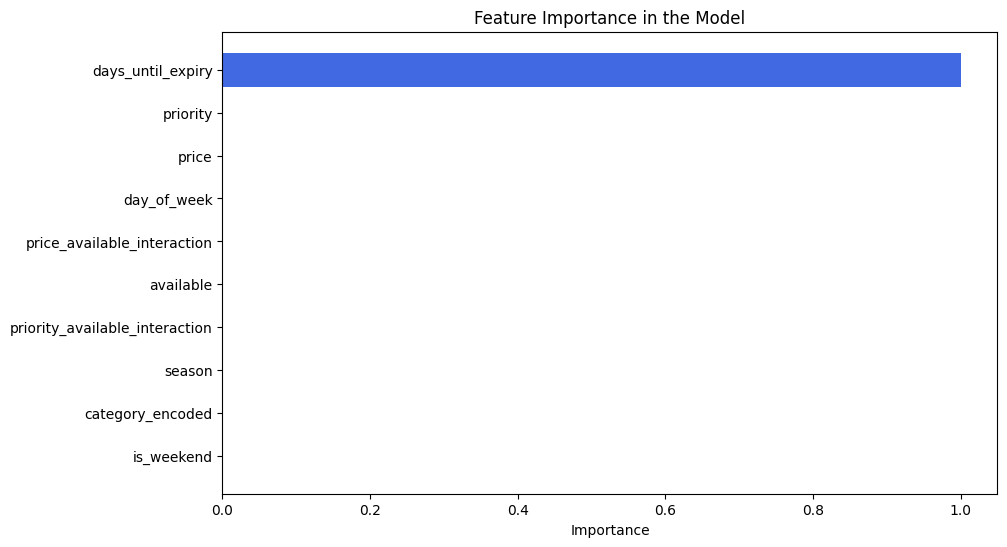

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.title('Feature Importance in the Model')
plt.gca().invert_yaxis()  # To have the most important at the top
plt.show()


In [ ]:
fake_data.to_json('updated_fake_data.json', orient='records', lines=True)


In [ ]:
# Define the new feature set excluding the less important features
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 
                'category_encoded', 'is_weekend', 'season']

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with the new feature set
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 3.312500000000023e-05
R² Score: 0.9999999969946088


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# After training the model, access feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to show feature names and their importance
features_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(features_df)

             Feature    Importance
2  days_until_expiry  9.999917e-01
3           priority  8.247675e-06
0              price  8.402032e-09
6             season  9.000411e-10
1          available  7.711312e-10
4   category_encoded  0.000000e+00
5         is_weekend  0.000000e+00


In [ ]:
# Create interaction features for category_encoded and is_weekend
fake_data['category_price_interaction'] = fake_data['category_encoded'] * fake_data['price']
fake_data['category_available_interaction'] = fake_data['category_encoded'] * fake_data['available']
fake_data['weekend_price_interaction'] = fake_data['is_weekend'] * fake_data['price']
fake_data['weekend_available_interaction'] = fake_data['is_weekend'] * fake_data['available']

# Add these interaction features to the feature set
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 
                'category_encoded', 'is_weekend', 'category_price_interaction', 
                'category_available_interaction', 'weekend_price_interaction',
                'weekend_available_interaction', 'season']


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor with interaction features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 3.756249999999758e-05
R² Score: 0.9999999965919999


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# After training the model, access feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to show feature names and their importance
features_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(features_df)

                           Feature    Importance
2                days_until_expiry  9.999928e-01
3                         priority  7.149786e-06
0                            price  8.359132e-09
7   category_available_interaction  1.549000e-09
6       category_price_interaction  1.034882e-09
8        weekend_price_interaction  6.107048e-10
9    weekend_available_interaction  4.249366e-10
10                          season  2.452413e-10
1                        available  0.000000e+00
5                       is_weekend  0.000000e+00
4                 category_encoded  0.000000e+00


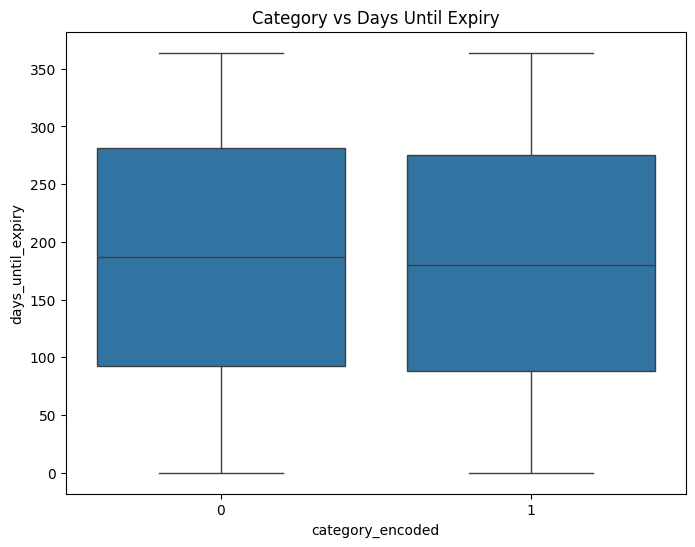

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to see the relationship between category and days_until_expiry
plt.figure(figsize=(8, 6))
sns.boxplot(x=fake_data['category_encoded'], y=fake_data['days_until_expiry'])
plt.title("Category vs Days Until Expiry")
plt.show()


In [ ]:
# Check category_encoded distribution
print(fake_data['category_encoded'].value_counts())

# Check is_weekend distribution
print(fake_data['is_weekend'].value_counts())


category_encoded
1    5599
0    2401
Name: count, dtype: int64
is_weekend
0    5706
1    2294
Name: count, dtype: int64


In [ ]:
# Assign different shelf life for wet (1) and dry (0) categories
fake_data['shelf_life'] = fake_data['category_encoded'].apply(lambda x: 30 if x == 1 else 90)

# Adjust days until expiry based on category shelf life
fake_data['adjusted_days_until_expiry'] = fake_data['days_until_expiry'] / fake_data['shelf_life']


In [ ]:
# Interaction between season and category_encoded
fake_data['season_category_interaction'] = fake_data['season'] * fake_data['category_encoded']


In [ ]:
# Define the updated feature set with new interactions
feature_cols = ['price', 'available', 'days_until_expiry', 'priority', 
                'category_encoded', 'is_weekend', 'category_price_interaction', 
                'category_available_interaction', 'weekend_price_interaction',
                'weekend_available_interaction', 'season', 'adjusted_days_until_expiry', 'season_category_interaction']

# Prepare the data
X = fake_data[feature_cols]
y = fake_data['days_until_expiry']

# Train the model and evaluate as before
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 3.756249999999758e-05
R² Score: 0.9999999965919999
